In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from scipy.stats import ttest_1samp, ttest_ind

$$H_0: \mu=\mu_0\\
H_1: \mu \neq \mu_0 $$

In [3]:
sample = [3,5,4,6,2,3,4,5,5,4]
mu0 = 3
ttest_1samp(sample, mu0, alternative='two-sided')

TtestResult(statistic=2.905487990874558, pvalue=0.01743886090834335, df=9)

In [4]:
t_obs = ((np.mean(sample) - mu0) / np.std(sample, ddof=1))*np.sqrt(len(sample))

In [5]:
from scipy.stats import t

In [6]:
T = t(df=len(sample)-1)

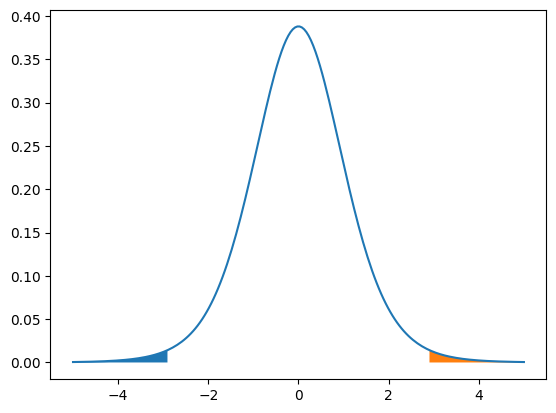

In [7]:
x = np.linspace(-5, 5, 200)
plt.plot(x, T.pdf(x))
x_left = np.linspace(-5, -t_obs)
x_right = np.linspace(t_obs, 5)
plt.fill_between(x_left, T.pdf(x_left))
plt.fill_between(x_right, T.pdf(x_right))

In [8]:
p_value = 2 * T.cdf(-t_obs)
p_value

0.017438860908343328

Simulations to test t-test

In [9]:
sample_size = 20
iterations = 10000
significance_level = 0.05
fp_counter = 0
for i in range(iterations):
    sample = np.random.normal(size=sample_size)
    t_stat, p_value = ttest_1samp(sample, 0)
    if p_value < significance_level:
        fp_counter += 1
print(fp_counter / iterations)

0.0482


In [10]:
sample_size = 50
iterations = 10000
significance_level = 0.05
fp_counter = 0
for i in range(iterations):
    sample = np.random.uniform(low=-1, high=1, size=sample_size)
    t_stat, p_value = ttest_1samp(sample, 0)
    if p_value < significance_level:
        fp_counter += 1
print(fp_counter / iterations)

0.0486


In [11]:
sample_size = 50
iterations = 10000
significance_level = 0.05
fp_counter = 0
population = [1, 3, 4, 1, 2.2, 4.4, 3.3, 6.6,  10000]
for i in range(iterations):
    sample = np.random.choice(population, size=sample_size)
    t_stat, p_value = ttest_1samp(sample, np.mean(population))
    if p_value < significance_level:
        fp_counter += 1
print(fp_counter / iterations)

0.0819


One-tailed t-test

In [12]:
sample_size = 20
iterations = 10000
significance_level = 0.05
fp_counter = 0
for i in range(iterations):
    sample = np.random.normal(size=sample_size)
    t_stat, p_value = ttest_1samp(sample, 0)
    p_value /= 2
    if t_stat > 0 and p_value < significance_level:
        fp_counter += 1
print(fp_counter / iterations)

0.0522


In [13]:
sample_size = 20
iterations = 10000
significance_level = 0.05
fp_counter = 0
for i in range(iterations):
    sample = np.random.normal(size=sample_size)
    t_stat, p_value = ttest_1samp(sample, 0, alternative='greater')
    p_value /= 2
    if t_stat > 0 and p_value < significance_level:
        fp_counter += 1
print(fp_counter / iterations)


0.0952


In [15]:
print(sample)
t_stat, p_value1 = ttest_1samp(sample, 0, alternative='greater')
t_stat, p_value = ttest_1samp(sample, 0)
p_value1, p_value

[ 2.29328157  0.24635058 -0.08375047  0.13709243  1.00527645  1.74626214
 -1.47675649 -1.66917668  0.62944523 -0.98307203  1.14315417  1.05968794
 -0.89508841 -0.38822238  1.24494211 -0.0959364  -1.89452812  1.04507719
  1.00518025 -1.33721827]


(0.3096174672865992, 0.6192349345731984)

In [55]:
t_stat = 3
sample_size = 5
T = t(df=(sample_size-1))
p_value = 1 - T.cdf(t_stat)
p_value*2

0.03994196807171879

Two-samples t-test

In [63]:
sample = [165, 170, 175, 180, 185, 185, 190, 195, 200, 210]
mu = 175
ttest_1samp(sample, mu)
np.mean(sample)

185.5

In [62]:
mu0 = 39250
sample_mu = avg_salary + 1900
sample_std = 5000
sample_size = 25
t_obs = (sample_mu - mu0) / sample_std *np.sqrt(sample_size)

T = t(df=24)
p_val = (1-T.cdf(t_obs))*2
p_val

0.06951310490361085